In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(0)  # garante que o conjunto de dados seja sempre particionado da mesma forma
clf = DecisionTreeClassifier(random_state=0)

In [63]:
def getAccuracy(testset, predictions):
    correct = 0
    for id_test, test in enumerate(testset):
        if test == predictions[id_test]:
            correct += 1
    return (correct / float(len(testset))) * 100.0

data = load_iris()
data = pd.DataFrame(np.hstack((data['data'], data['target'].reshape(data['target'].shape[0], 1))), 
                    columns=data['feature_names'] + ['class']
)

X = data[data.columns[:-1]]
Y = data[data.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, stratify=Y)

clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

print('accuracy score:', getAccuracy(Y_test, predictions))

('accuracy score:', 94.73684210526315)


### Exercício censo 1995 nos Estados Unidos

* O conjunto de dados ```adult``` trata de um censo demográfico realizado nos Estados Unidos em 1995
* O atributo classe se refere a caso um indivíduo ganha mais que 50,000 dólares por ano ou não

Tarefas:

* Separe o dataset em treino e teste (use seed=0), com 75% para treino e 25% para teste
* Adicione valores faltantes, trate os atributos categóricos
* Treine uma [árvore de decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) neste conjunto
* Reporte a [acurácia](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
* Visualize a árvore de decisão (tutorial: [link](http://scikit-learn.org/stable/modules/tree.html#classification))

Descrição dos arquivos:

* adult.csv: dataset
* adult_description: descrição do conjunto de dados

### Carrega conjunto de dados, define tipos de colunas

In [116]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

random.seed(0)
np.random.seed(0)  # garante que o conjunto de dados seja sempre particionado da mesma forma

df = pd.read_csv(
    filepath_or_buffer='adult.csv', 
    dtype={
        'age': np.float32,
        'workclass': 'category',
        'fnlwgt': np.float32,
        'education': 'category',
        'education-num': np.float32,
        'marital-status': 'category',
        'occupation': 'category',
        'relationship': 'category',
        'race': 'category',
        'sex': 'category',
        'capital-gain': np.float32,
        'capital-loss': np.float32,
        'hours-per-week': np.float32,
        'native-country': 'category',
        'salary': 'category',
    },
    na_values='?',  # detecta ? como um valor NaN
    skipinitialspace=True  # ignora espaços em branco entre valores
)

display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,up to 50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,up to 50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,up to 50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,up to 50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,up to 50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,up to 50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,up to 50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,more than 50K
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,more than 50K
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,more than 50K


### Substitui valores faltantes pela média de cada atributo

### Transforma atributos preditivos categóricos em numéricos 
**seja binarizando ou atribuindo um número a cada valor**

### Transforma o atributo classe (que é binário) em numérico ordinal

**Atributos classe não precisam ser binarizados.**

Esse código também reenvia o atributo classe para a última posição no dataset, já que ele foi deslocado.

In [120]:
fact, class_labels = pd.factorize(df['salary'].astype(np.object))

df['salary'] = fact
columns = df.columns.tolist()
columns.pop(columns.index('salary'))
columns.append('salary')
df = df.reindex(columns=columns)
display(df)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,State-gov,Self-emp-not-inc,Private,Federal-gov,...,Scotland,Trinadad and Tobago,Greece,Nicaragua,Vietnam,Hong,Ireland,Hungary,Holand-Netherlands,salary
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,37.0,284582.0,14.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,49.0,160187.0,5.0,0.0,0.0,16.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,52.0,209642.0,9.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,31.0,45781.0,14.0,14084.0,0.0,50.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,42.0,159449.0,13.0,5178.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Treinamento

#### Separa dados entre treino e teste

In [121]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df[df.columns[:-1]], df[df.columns[-1]]

# utiliza 25% do dataset para teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)  

#### Treina uma árvore de decisão, testa no conjunto de testes e calcula a acurácia

In [122]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, Y_train)

predictions = dt.predict(X_test)

print('accuracy score:', accuracy_score(Y_test, predictions))

accuracy score: 0.842600933584473


### Bônus: visualizando a árvore

Talvez você precise executar mais algumas etapas para rodar este código:

```
conda install graphviz
conda install pydotplus

pip install graphviz
pip install pydotplus
```

**esse código também executa em uma versão reduzida do dataset, para evitar uma árvore de decisão muito grande.**

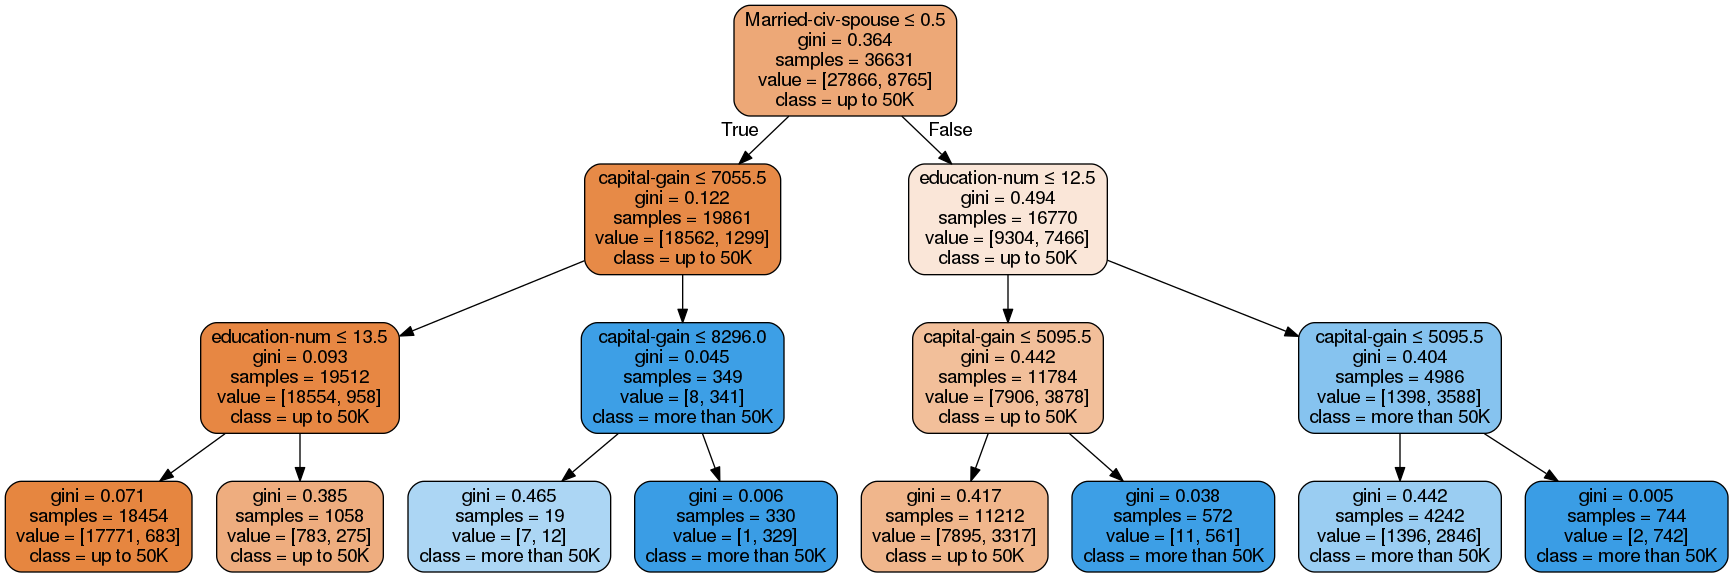

In [123]:
import graphviz 
import pydotplus
from IPython.display import Image 

dot_data = tree.export_graphviz(
    dt, out_file=None, 
    feature_names=df.columns[:-1],  # ignora classe
    class_names=class_labels,  
    filled=True, rounded=True,  
    special_characters=True
)  

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())